In [92]:
using Plots
using CSV
using DataFrames
using Statistics
using Plots.PlotMeasures



In [98]:
#df4 = CSV.read("scop40_fs4.tsv", DataFrame, delim="\t", header=1)
#rename!(df4, "fxity" => "fxity4")
#df8 = CSV.read("scop40_fs8.tsv", DataFrame, delim="\t", header=1)
#rename!(df8, "fxity" => "fxity8")
#df12 = CSV.read("scop40_fs12.tsv", DataFrame, delim="\t", header=1)
#rename!(df12, "fxity" => "fxity12")
df = CSV.read("scop40.tsv", DataFrame, delim="\t", header=1)
df[!, [:fxity, :aver_rmsd]] = round.(df[:,[:fxity, :aver_rmsd]], digits = 2)

print()

In [102]:
df = dropmissing(df)
df2 = df[(df.nfrags .> 100) .& (df.nfrags .< 1000),:]
sort!(df2,:aver_rmsd)
df2[end-20:end,:]

21×6 DataFrame
 Row │ ndx    pdbpath                    fxity    nclusts  aver_rmsd  nfrags 
     │ Int64  String31                   Float64  Int64    Float64    Int64  
─────┼───────────────────────────────────────────────────────────────────────
   1 │   914  ../scop40tm05/d3w5ha2.ent     0.57       90       3.35     158
   2 │   184  ../scop40tm05/d1bf2a1.ent     0.33       53       3.41     160
   3 │  1729  ../scop40tm05/d2wdsa_.ent     0.52       64       3.41     124
   4 │   241  ../scop40tm05/d3q46a_.ent     0.61      124       3.44     203
   5 │  1884  ../scop40tm05/d2yivx_.ent     0.34      223       3.44     665
   6 │  3144  ../scop40tm05/d7jzsa1.ent     0.38       79       3.46     210
   7 │  1155  ../scop40tm05/d4b8ra_.ent     0.3       142       3.49     471
   8 │  1844  ../scop40tm05/d2y78a1.ent     0.67       78       3.49     116
  ⋮  │   ⋮                ⋮                 ⋮        ⋮         ⋮        ⋮
  15 │  2768  ../scop40tm05/d2b3na_.ent     0.6        98       3.61     162
  16 │   972  ../scop40tm05/d2jlia_.ent     0.6        61       3.67     102
  17 │   512  ../scop40tm05/d3t2ca_.ent     0.52      225       3.73     431
  18 │  1457  ../scop40tm05/d1hx6a2.ent     0.51       77       3.73     151
  19 │   935  ../scop40tm05/d3wjda_.ent     0.49       76       4.05     154
  20 │   301  ../scop40tm05/d2edma1.ent     0.35       56       4.09     159
  21 │  1286  ../scop40tm05/d1tlja_.ent     0.3        56       4.15     187
                                                               6 rows omitted

fxity vs nclusts: -0.1;      fxity vs aver_rmsd: 0.48;      nclusts vs nfrags: 0.82;      nclusts vs aver_rmsd: 0.49


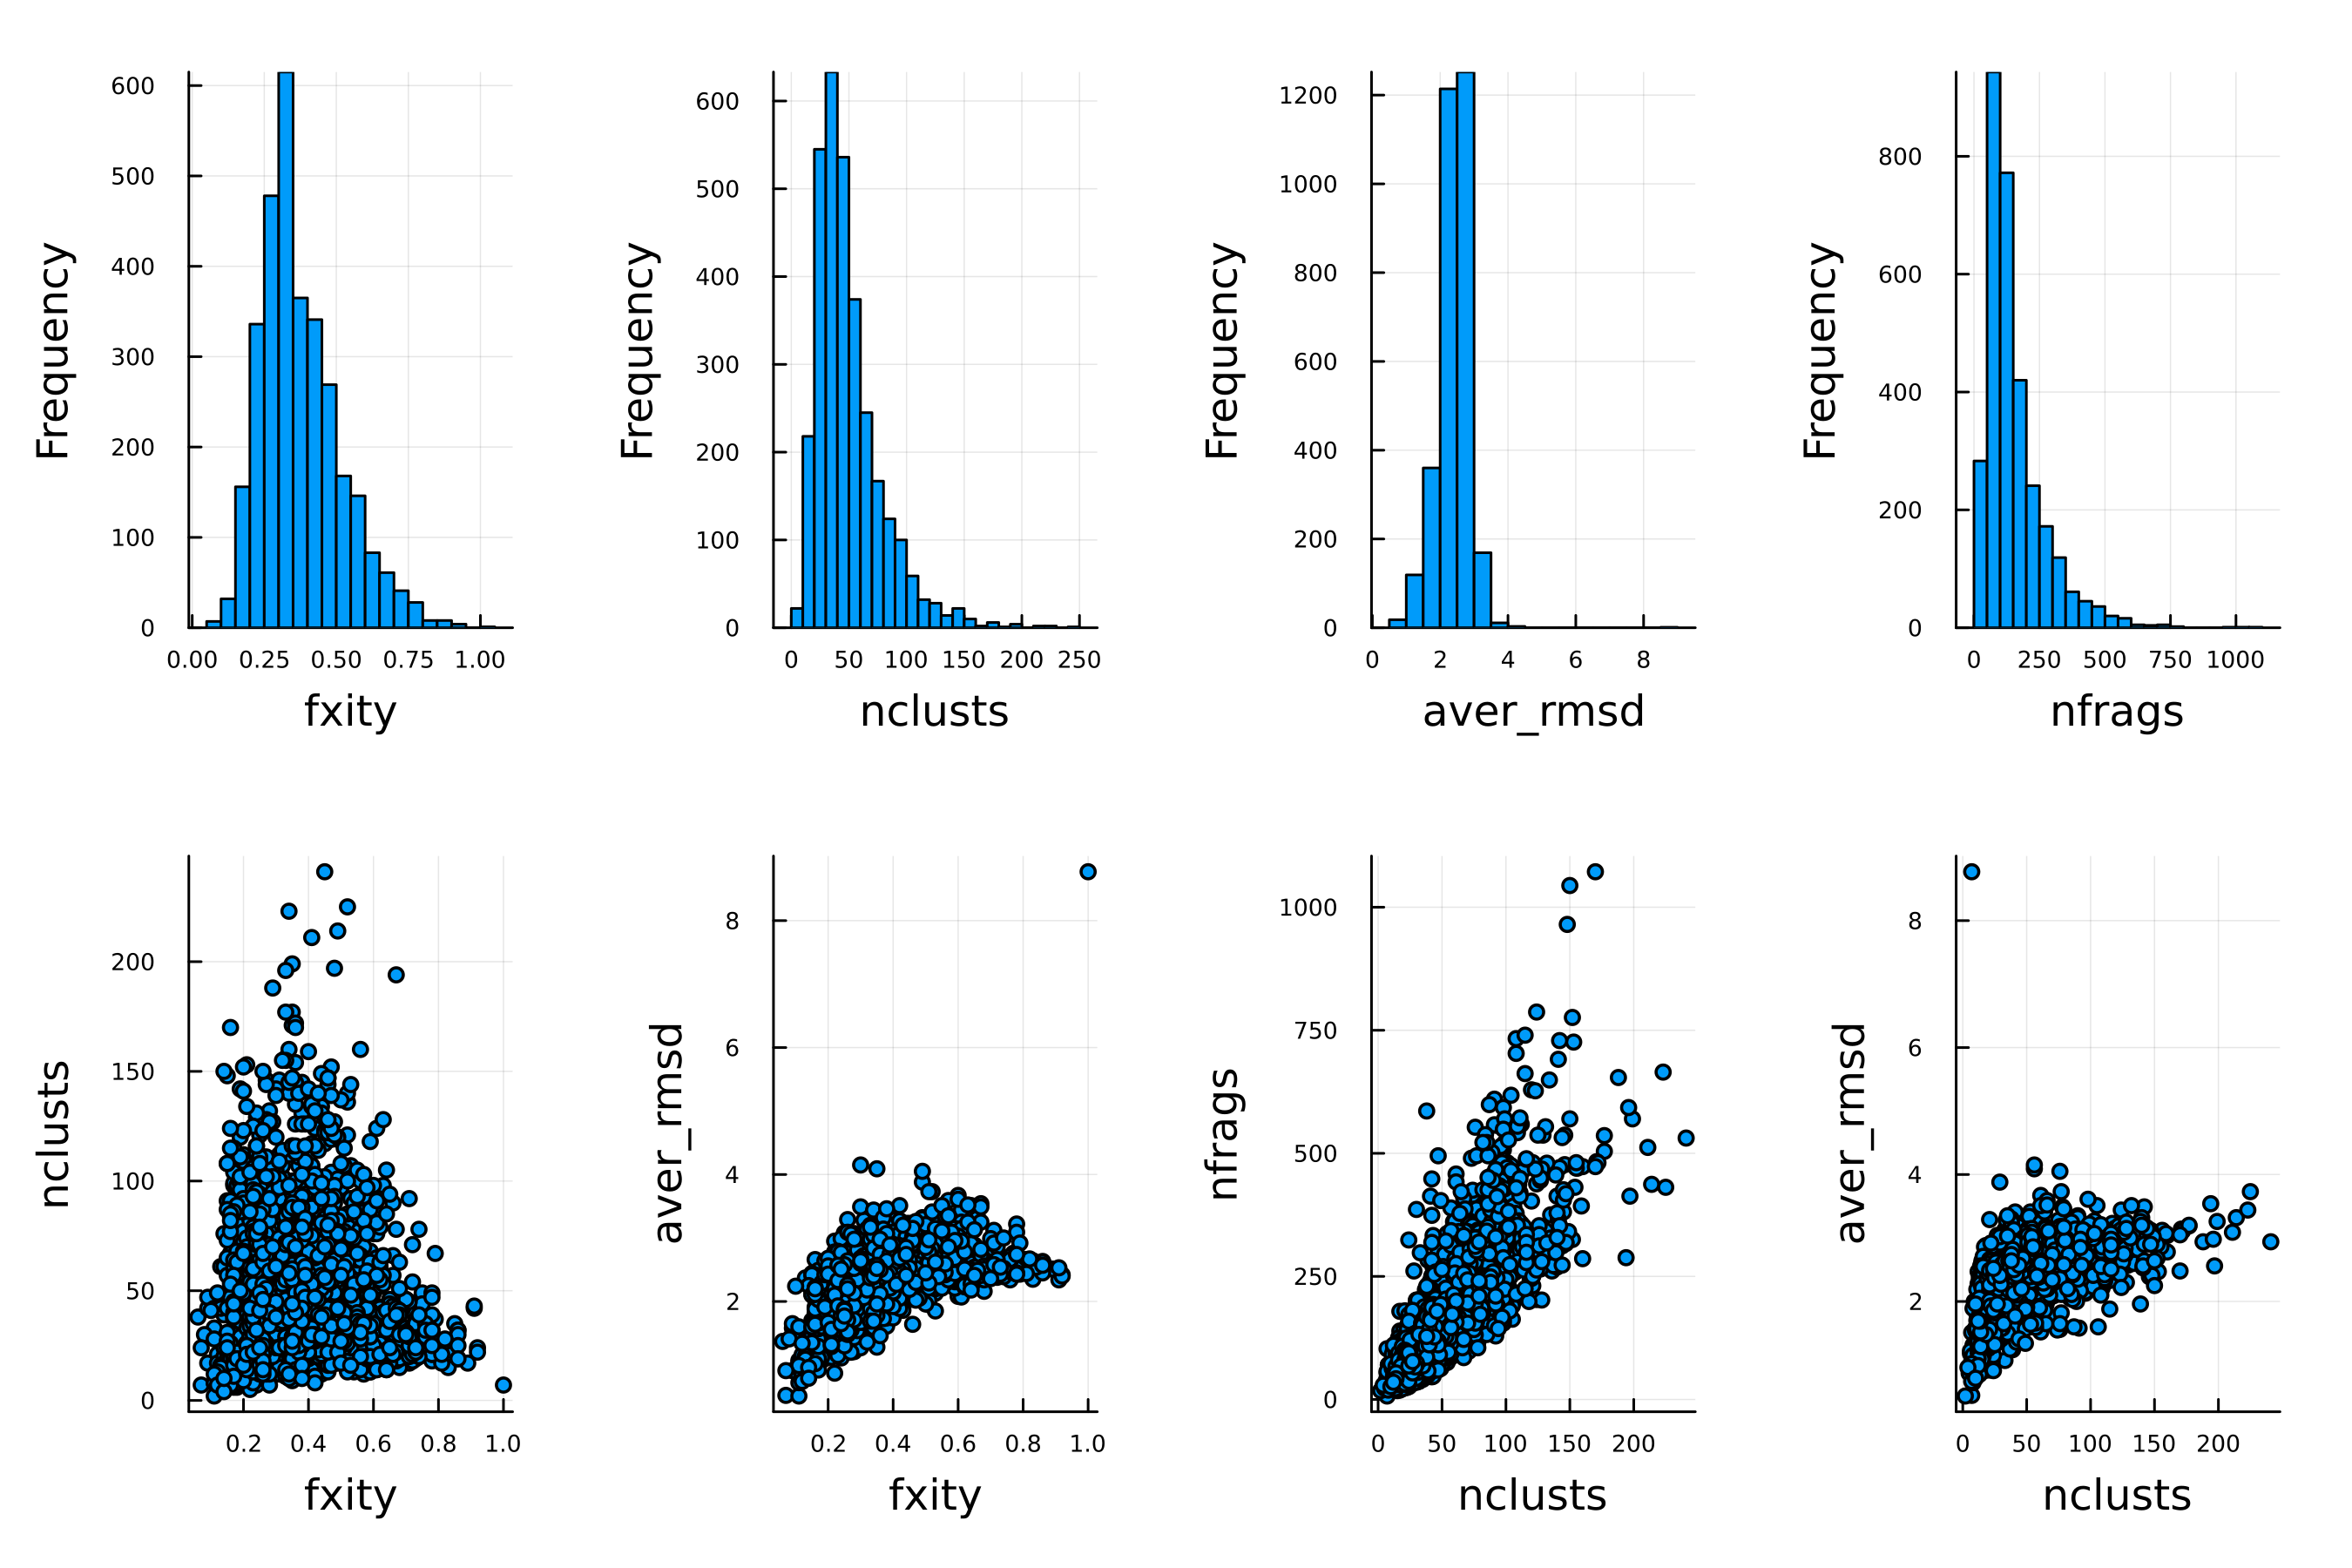

In [100]:
println("fxity vs nclusts: ", round(cor(df.fxity, df.nclusts), digits = 2),
";      fxity vs aver_rmsd: ", round(cor(df.fxity, df.aver_rmsd), digits = 2),
";      nclusts vs nfrags: ", round(cor(df.nclusts, df.nfrags), digits = 2),
";      nclusts vs aver_rmsd: ", round(cor(df.nclusts, df.aver_rmsd), digits = 2 )
)


p1 = histogram(df.fxity, bins=25,    xlabel="fxity", ylabel="Frequency", labels="")
p2 = histogram(df.nclusts, bins=25,    xlabel="nclusts", ylabel="Frequency", labels="")
p3 = histogram(df.aver_rmsd, bins=25,   xlabel="aver_rmsd", ylabel="Frequency", labels="")
p4 = histogram(df.nfrags, bins=25,    xlabel="nfrags", ylabel="Frequency", labels="")

p5 = scatter(df.fxity, df.nclusts,  xlabel="fxity", ylabel="nclusts", markershape=:circle, markersize = 3, labels="")
p6 = scatter(df.fxity, df.aver_rmsd,  xlabel="fxity", ylabel="aver_rmsd", markershape=:circle, markersize = 3,labels="")
p7 = scatter(df.nclusts, df.nfrags,  xlabel="nclusts", ylabel="nfrags", markershape=:circle, markersize = 3, labels="")
p8 = scatter(df.nclusts, df.aver_rmsd,  xlabel="nclusts", ylabel="aver_rmsd", markershape=:circle, markersize = 3, labels="")



plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(2, 4), margins = 5mm, dpi=300, xtickfontsize=6, ytickfontsize=6)
plot!(size=(900,600))
